In [1]:
#IDENTIFYING THE PROBLEM

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [47]:
#Loading dataset
df = pd.read_csv('breastcancerdata.csv', index_col = False)

#Dropping the ID column as it is unnecessary for analysis
df.drop('id', axis = 1, inplace = True)
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [4]:
#Concise summary of the data
#Output provides type of data in each column, number of non-null values in each column and memory used by dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 

In [8]:
df.shape

(569, 31)

In [5]:
#Checking for missing variables

df.isnull().any()

radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_dimension_worst    False
diagnosis 

In [6]:
#Expected Outcome

#1 = Malignant (Cancerous) - Present
#0 = Benign (Not Cancerous) - Absent 
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

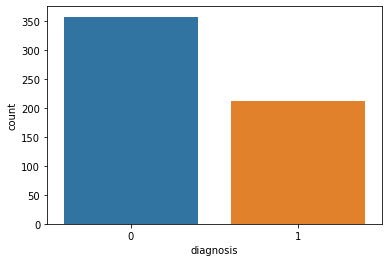

In [7]:
#Visualising the count

sns.countplot(df.diagnosis, label = "count")
plt.show()

In [9]:
#EXPLORATORY DATA ANALYSIS

In [10]:
#Descriptive Statistics

df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
df.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

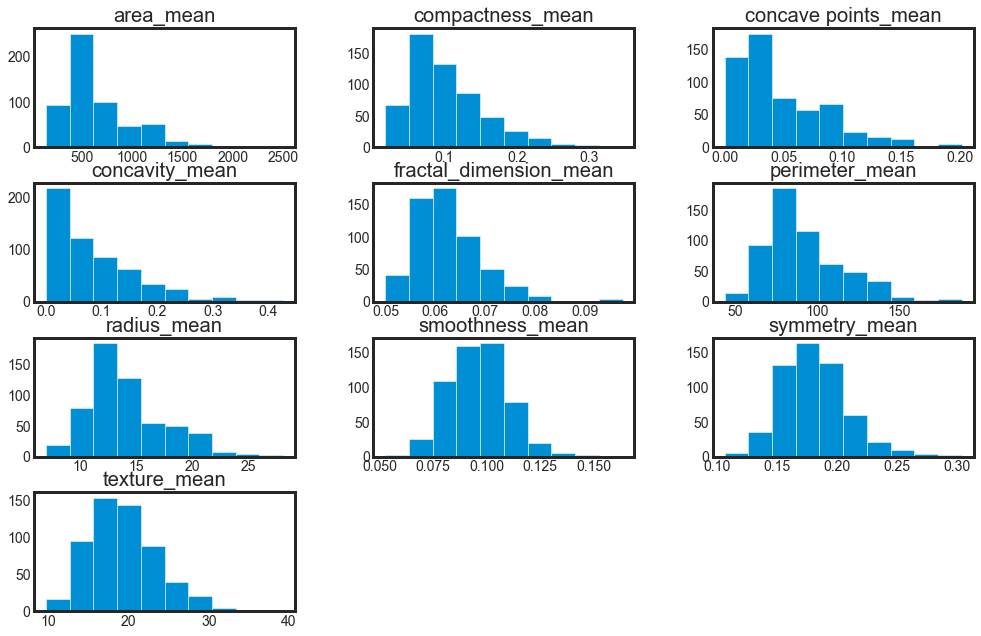

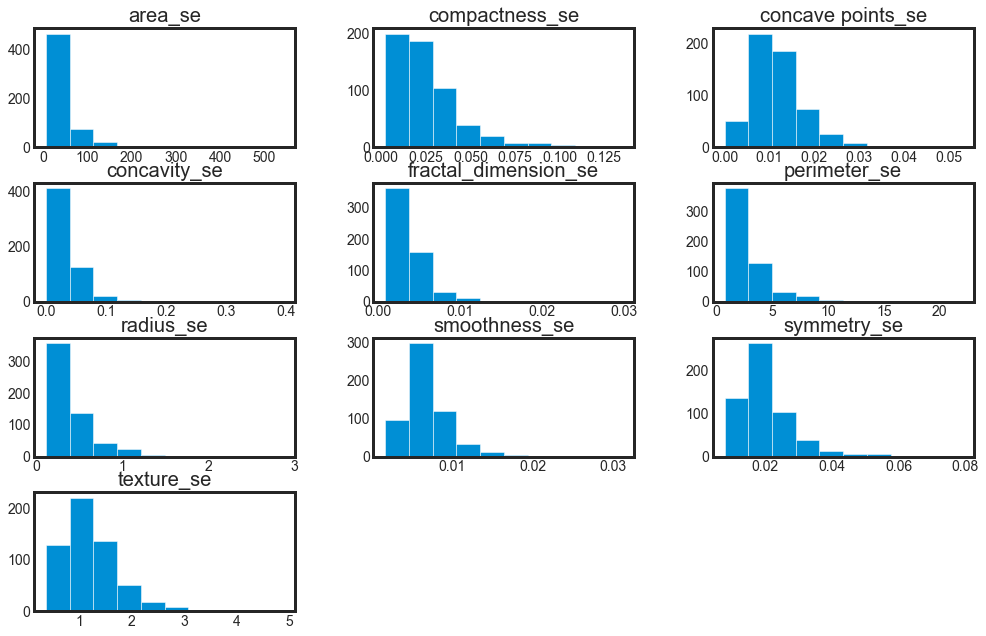

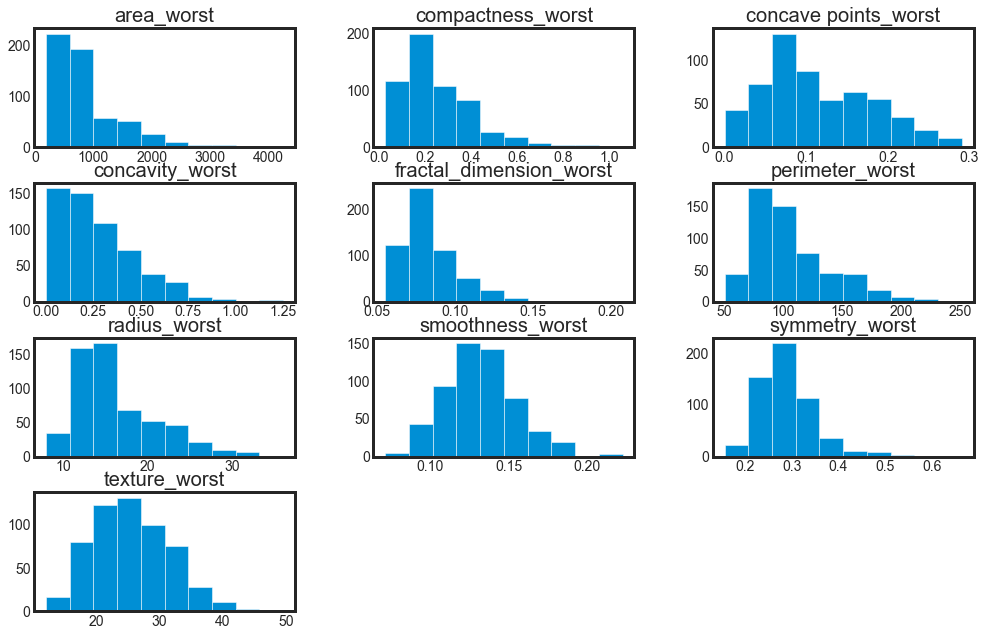

In [28]:
#Histogram Visualisation

data_mean = df.ix[:,0:10]
data_se = df.ix[:,10:20]
data_worst = df.ix[:,20:30]

hist_mean = data_mean.hist(bins=10, figsize=(15, 10),grid=False,)
hist_se = data_se.hist(bins=10, figsize=(15,10), grid=False,)
hist_worst = data_worst.hist(bins=10, figsize=(15,10), grid=False,)

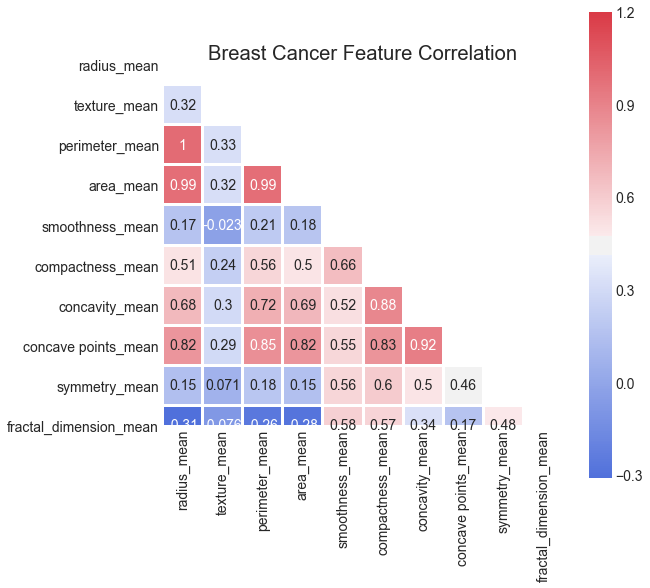

In [30]:
#Correlation Matrix Visualisation

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

# Computing the correlation matrix
corr = data_mean.corr()

# Generating a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Setting up the matplotlib figure
data, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# Generating a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

In [31]:
#DATA PRE-PROCESSING

In [33]:
X = np.array(df.drop(['diagnosis'], axis = 1))
Y = np.array(df['diagnosis'])

In [35]:
#Splitting the dataset into Training Set and Testing Set

from sklearn.model_selection import train_test_split,ShuffleSplit
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [62]:
#Feature Standardization
#Transforming attributes to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Xs = sc.fit_transform(X)

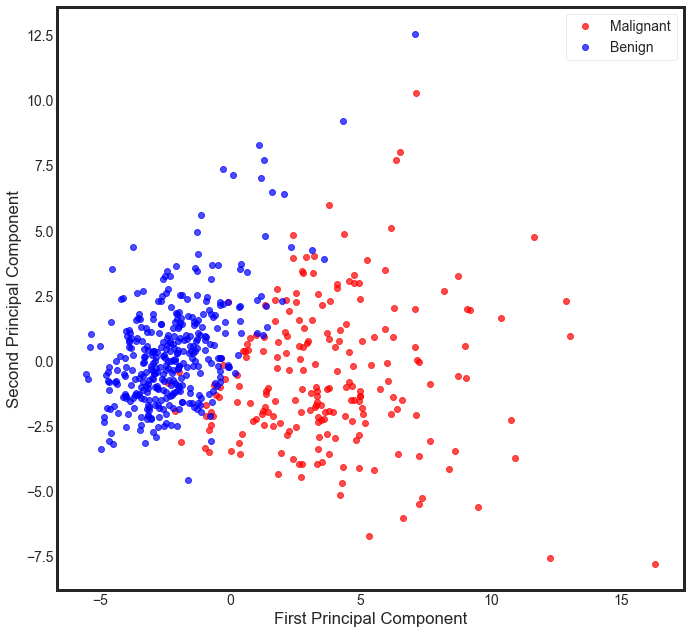

In [75]:
#Feature Decomposition
#Principal Component Analysis

from sklearn.decomposition import PCA
pca = PCA(n_components=10)
fit = pca.fit(Xs)
explained_variance=pca.explained_variance_ratio_
#print(pca.explained_variance_ratio_)

X_pca = pca.transform(Xs)

plt.figure(figsize=(10,10))

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][df.diagnosis == 1],PCA_df['PCA_2'][df.diagnosis == 1],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][df.diagnosis == 0],PCA_df['PCA_2'][df.diagnosis == 0],'o', alpha = 0.7, color = 'b')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(['Malignant','Benign'])

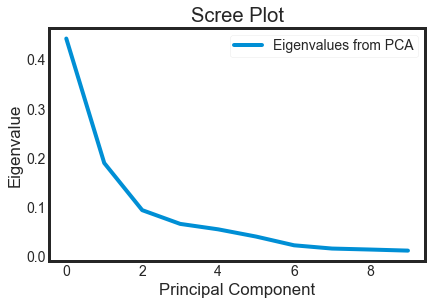

In [70]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

[[99  9]
 [ 6 57]]
Accuracy score of train KNN
100.0
Accuracy score of test KNN
91.22807017543859
[[103   5]
 [  8  55]]
Accuracy score of train KNN
95.47738693467338
Accuracy score of test KNN
92.39766081871345
[[101   7]
 [  4  59]]
Accuracy score of train KNN
94.9748743718593
Accuracy score of test KNN
93.56725146198829
[[106   2]
 [  4  59]]
Accuracy score of train KNN
93.96984924623115
Accuracy score of test KNN
96.49122807017544
[[102   6]
 [  4  59]]
Accuracy score of train KNN
94.9748743718593
Accuracy score of test KNN
94.15204678362574
[[106   2]
 [  6  57]]
Accuracy score of train KNN
94.47236180904522
Accuracy score of test KNN
95.32163742690058
[[104   4]
 [  4  59]]
Accuracy score of train KNN
94.47236180904522
Accuracy score of test KNN
95.32163742690058
[[105   3]
 [  4  59]]
Accuracy score of train KNN
94.22110552763819
Accuracy score of test KNN
95.90643274853801
[[105   3]
 [  4  59]]
Accuracy score of train KNN
94.22110552763819
Accuracy score of test KNN
95.9064327

Text(0, 0.5, 'Accuracy')

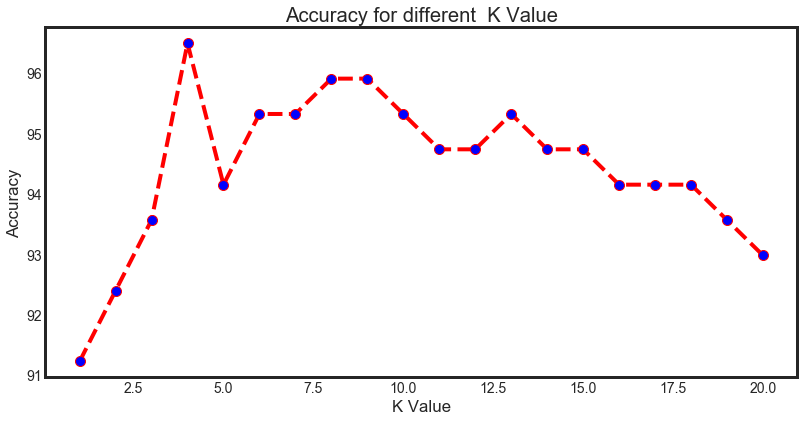

In [76]:
#Fitting KNN to the Training Set

from sklearn.neighbors import KNeighborsClassifier
knn = []
for i in range(1,21):
            
    classifier = KNeighborsClassifier(n_neighbors=i)
    trained_model=classifier.fit(X_train, Y_train)
    trained_model.fit(X_train, Y_train )
    
    # Predicting the Test set results
    
    Y_pred = classifier.predict(X_test)
    
    # Making the Confusion Matrix
    
    from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
    
    cm_KNN = confusion_matrix(Y_test, Y_pred)
    print(cm_KNN)
    print("Accuracy score of train KNN")
    print(accuracy_score(Y_train, trained_model.predict(X_train))*100)
    
    print("Accuracy score of test KNN")
    print(accuracy_score(Y_test, Y_pred)*100)
    
    knn.append(accuracy_score(Y_test, Y_pred)*100)
    
print("\n\nClassification Report: ")
print(classification_report(Y_test, Y_pred))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 21),knn, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
plt.title('Accuracy for different  K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy') 


In [77]:
#Fitting SVM to the Training Set

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

trained_model=classifier.fit(X_train, Y_train)
trained_model.fit(X_train, Y_train)


# Predicting the Test set results

Y_pred = classifier.predict(X_test)

On linear kernel


Confusion Matrix:
[[103   5]
 [  6  57]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       108
           1       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



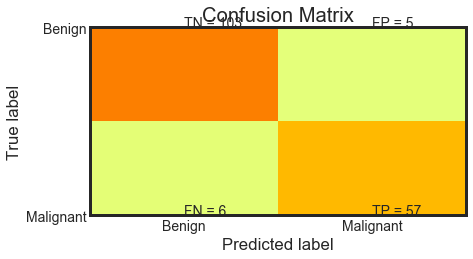


Accuracy Of the Model:  0.935672514619883 




In [79]:
from sklearn import metrics
def plot_confusion_metrix(Y_test,model_test):
    cm = metrics.confusion_matrix(Y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Benign','Malignant']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
    
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(Y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(Y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(Y_test, model_test)

def accuracy(model):
    
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(Y_test,pred)
    print("\nAccuracy Of the Model: ",accu,"\n\n")
    

classifier.fit(X_train, Y_train)
print("On linear kernel")
report_performance(classifier)
accuracy(classifier)

In [80]:
#Fitting Logistic Regression to the Training Set

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
logistic_model = LogisticRegression(random_state = 0)
logistic_model.fit(X_train, Y_train)
Y_predict =logistic_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predict)

print("\n\nClassification Report: ")
print(classification_report(Y_test, Y_predict))



Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

